# A Simple Example
1. datasets: iris
2. classification model: DecisionTrees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# prepare iris dataset
iris_ex = load_iris()
iris_ex.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
print(iris_ex["target_names"])
print(iris_ex["feature_names"])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
X_ex = iris_ex.data[:,2:] # petal length and width
y_ex = iris_ex.target

tree_ex_2_clf = DecisionTreeClassifier(max_depth=2)
tree_ex_2_clf.fit(X_ex, y_ex)
tree_ex_3_clf = DecisionTreeClassifier(max_depth=3)
tree_ex_3_clf.fit(X_ex, y_ex)
tree_ex_5_clf = DecisionTreeClassifier(max_depth=5)
tree_ex_5_clf.fit(X_ex, y_ex)
tree_ex_12_clf = DecisionTreeClassifier(max_depth=12)
tree_ex_12_clf.fit(X_ex, y_ex)

DecisionTreeClassifier(max_depth=12)

In [4]:
print(X_ex.max(axis=0))
print(X_ex.min(axis=0))

[6.9 2.5]
[1.  0.1]


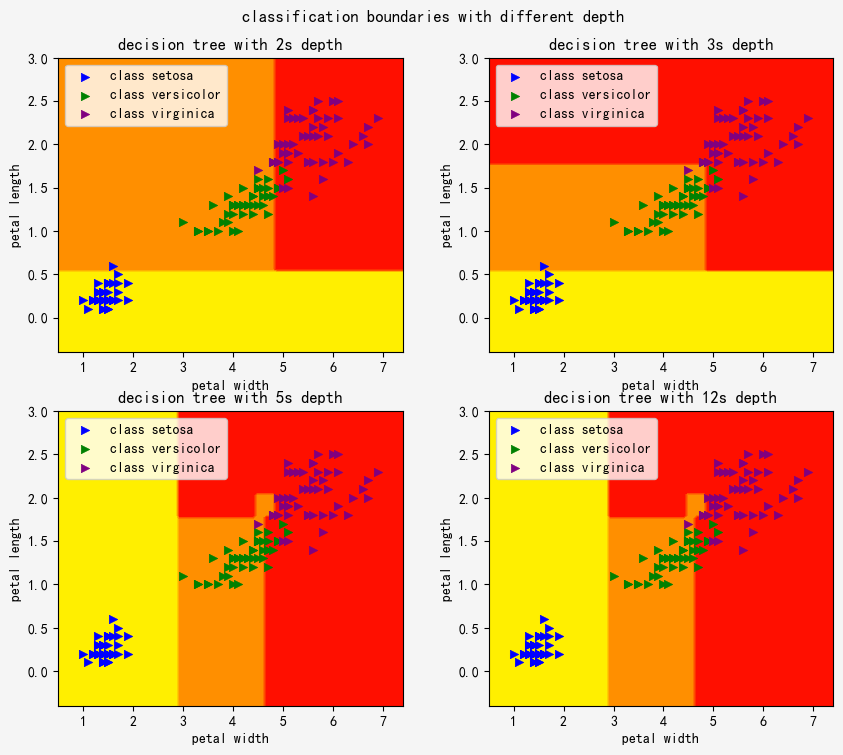

In [5]:
import matplotlib as mpl
import numpy as np
import copy
from matplotlib import pyplot as plt
from collections import Counter

%matplotlib inline

plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# prepare for display in different class
ids_collection = [[],[],[]]
for ids,(data,label) in enumerate(zip(X_ex,y_ex)):
    if label == 0:
        ids_collection[0].append(data)
    elif label == 1:
        ids_collection[1].append(data)
    else:
        ids_collection[2].append(data)    
ids_collection = np.array(ids_collection,dtype=np.float64)

# prepare for display of classification plane
X_mesh = np.linspace(X_ex.min(axis=0)[0]-0.5,X_ex.max(axis=0)[0]+0.5,100)
Y_mesh = np.linspace(X_ex.min(axis=0)[1]-0.5,X_ex.max(axis=0)[1]+0.5,100)
XX_mesh, YY_mesh = np.meshgrid(X_mesh, Y_mesh)
ZZ_mesh = np.zeros_like(XX_mesh)
ZZ_mesh_collection = [[],[],[],[]]

for ids,clf in enumerate([tree_ex_2_clf,tree_ex_3_clf,tree_ex_5_clf,tree_ex_12_clf]):
    # predict each point in meshgrid
    for idx in range(len(X_mesh)):
        for idy in range(len(Y_mesh)):
            ZZ_mesh[idx,idy] = clf.predict([[X_mesh[idx],Y_mesh[idy]]])
    ZZ_mesh_collection[ids] = ZZ_mesh
    ZZ_mesh = np.zeros_like(XX_mesh)

fig, ax = plt.subplots(2,2,figsize=(10,8),
                      facecolor="whitesmoke",
                      edgecolor="gray")
fig.suptitle("classification boundaries with different depth")
fig.subplots_adjust(top=0.92,hspace=0.20,wspace=0.25)
for ai,dep,ZZ in zip(ax.flat,[2,3,5,12], ZZ_mesh_collection):
    ai.contourf(XX_mesh,YY_mesh,ZZ,cmap=plt.cm.autumn_r)
    ai.scatter(ids_collection[0,:,0],ids_collection[0,:,1],marker='>',
               lw=.5,color='blue', label="class setosa")
    ai.scatter(ids_collection[1,:,0],ids_collection[1,:,1],marker='>',
               lw=.5,color='green', label="class versicolor")
    ai.scatter(ids_collection[2,:,0],ids_collection[2,:,1],marker='>',
               lw=.5,color='purple', label="class virginica")
    ai.legend(loc="best")
    ai.set_xlabel("petal width")
    ai.set_ylabel("petal length")
    ai.set_title("decision tree with " + str(dep) + "s depth")

## notice
1. note that depth will determine the final probabilities of each class due to the fact that shallower trees would be more likely to experience early-stopping
2. thus the leaf nodes of shallower trees would be less pure.

In [6]:
width_value = 4.5
length_value = 2.5

print(tree_ex_12_clf.predict_proba([[width_value,length_value]]))
print(tree_ex_5_clf.predict_proba([[width_value,length_value]]))
print(tree_ex_2_clf.predict_proba([[width_value,length_value]]))

[[0.         0.33333333 0.66666667]]
[[0.         0.33333333 0.66666667]]
[[0.         0.02173913 0.97826087]]


In [7]:
print(tree_ex_12_clf.predict([[width_value,length_value]]))
print(tree_ex_5_clf.predict([[width_value,length_value]]))
print(tree_ex_2_clf.predict([[width_value,length_value]]))

[2]
[2]
[2]


# Mathmatical Background
## Impurity Function

### Gini Impurity
$$
    Gini(D) = 1-\displaystyle\sum_{k=1}^{N}{{p_k}^2}
$$

for property a, its Gini index should be like

$$
    Gini_{index}(D,a) = \displaystyle\sum_{v=1}^{V}{\frac{|D^v|}{|D|}Gini(D^v)}
$$

in formula above, we have $V$ properties, its index is $(1,2,\cdots,k,\cdots,N)$, and $a$ is one specific property

## Prune parameters
1. min_samples_split
2. min_samples_leaf
3. min_weight_fraction_leaf
4. max_leaf_nodes

# Decision Tree Regressor
1. mainly used in numerical and continuous data
2. instead of calculating impurity in each node, this tree calculate MSE, on which dividing point the model would produce smaller total MSE

$$
    J(v,a) = \frac{|D_{left}|}{|D|}{MSE}_{left} + \frac{|D_{right}|}{|D|}{MSE}_{right}
$$

where $v$ stands for vth attribute and $a$ stands for ath value in vth attribute, $|D|$ stands for numbers of total data points, and other parameters are list as follows:

$$
\left \{
\begin{array}{ll}
MSE_{node} = \displaystyle\sum_{i \in node}{(\hat y_{node} - y_i)^2} \\
\hat y_{node} = \frac{1}{m_{node}} \sum_{i \in node}{y_i}
\end{array}
\right.
$$

<hr>
1. Decision Tree Regressor will perform like its classifier, classification plane will always parallel to axis, and regression result will simply be the <font color=maroon><b>average of all data in one leaf node.</b></font>

## sklearn interpretation
```doc
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)

criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least min_samples_leaf training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

min_weight_fraction_leaf : float, default=0.0
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.

max_features : int, float or {"auto", "sqrt", "log2"}, default=None
    The number of features to consider when looking for the best split:

random_state : int, RandomState instance or None, default=None
    Controls the randomness of the estimator. The features are always
    randomly permuted at each split, even if ``splitter`` is set to
    ``"best"``. When ``max_features < n_features``, the algorithm will
    select ``max_features`` at random at each split before finding the best
    split among them. But the best found split may vary across different
    runs, even if ``max_features=n_features``. That is the case, if the
    improvement of the criterion is identical for several splits and one
    split has to be selected at random. To obtain a deterministic behaviour
    during fitting, ``random_state`` has to be fixed to an integer.
    See :term:`Glossary <random_state>` for details.

max_leaf_nodes : int, default=None
    Grow a tree with max_leaf_nodes in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.

min_impurity_decrease : float, default=0.0
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.

ccp_alpha : non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ccp_alpha will be chosen. By default, no pruning is performed. 
```

In [8]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl

np.random.RandomState(42)
X_reg = np.linspace(-1,1,100)
y_reg = np.power(X_reg,2)
y_reg_noise = y_reg + np.random.normal(loc=0, scale=.2, size=X_reg.shape[0])

tree_reg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
tree_reg.fit(X_reg.reshape(-1,1), y_reg_noise.reshape(-1,1))
X_pred = tree_reg.predict(X_reg.reshape(-1,1))

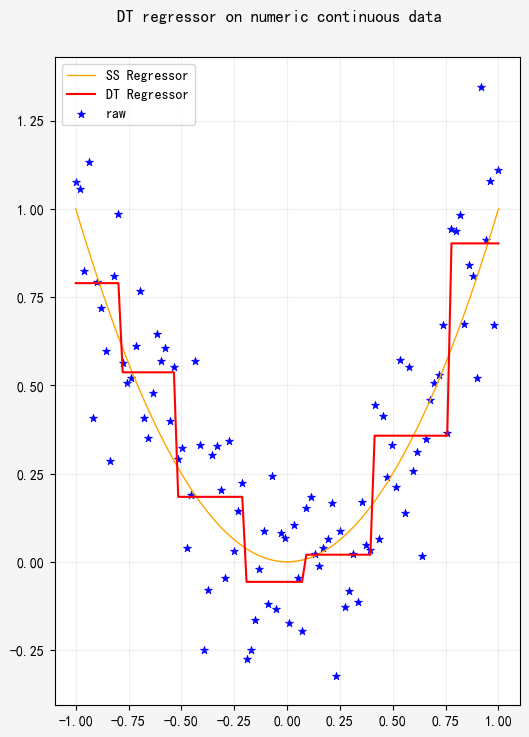

In [9]:
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(6,8),
                       facecolor="whitesmoke",
                      edgecolor="gray")
fig.suptitle("DT regressor on numeric continuous data")
fig.subplots_adjust(top=0.92)
ax.plot(X_reg,y_reg, ls='-', lw=1, color="orange", label="SS Regressor")
ax.plot(X_reg,X_pred, '-r', label="DT Regressor")
ax.scatter(X_reg,y_reg_noise, marker='*',lw=.5, color="blue", label="raw")
ax.legend(loc="best")
ax.grid(alpha=0.2)

## Ensemble
### voting classifier
1. hard: output class with highest number of votes
2. soft: output class with highest classification probability

#### hard voting

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ex, y_ex, shuffle=True, test_size=0.2)
logistic_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC()

voting_hard_clf = VotingClassifier(
                estimators=[('lr',logistic_clf),('rf',random_clf),('sv',svm_clf)],
                voting="hard")
voting_hard_clf.fit(X_train,y_train)
pass

In [11]:
from sklearn.metrics import accuracy_score

for clf in [logistic_clf, random_clf, svm_clf, voting_hard_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9666666666666667
RandomForestClassifier 0.9666666666666667
SVC 1.0
VotingClassifier 0.9666666666666667


#### soft voting

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ex, y_ex, shuffle=True, test_size=0.2)
logistic_clf = LogisticRegression()
random_clf = RandomForestClassifier()
# probability set to True, then SVC will use cross-validation to calculate predict_proba variable.
svm_clf = SVC(probability=True)

voting_hard_clf = VotingClassifier(
                estimators=[('lr',logistic_clf),('rf',random_clf),('sv',svm_clf)],
                voting="hard")
voting_hard_clf.fit(X_train,y_train)
pass

In [13]:
from sklearn.metrics import accuracy_score

for clf in [logistic_clf, random_clf, svm_clf, voting_hard_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


## Bagging & Pasting
1. bagging is short for "bootstrap aggregating"
2. basic concept is training data with the same training algorithm for every predictor, but training each predictor on different random subsets of training set.
3. when <font color=maroon><b>sampling is performed with replacement</b></font>, this mothod is called <font color=maroon><b>bagging</b></font>, <font color=maroon><b>when samling is performed without replacement</b></font>, it is called <font color=maroon><b>pasting</b></font>.
4. the ensemble will finally aggregate all predcition results of each single predictor, and find the most frequent appeared result, set it and the ensemble result. As in a statistic mode, <font color=maroon><b>central-limit theorem</b></font>, this aggregation would considerably reduce variance.

### sklearn interpretation
```doc
BaggingClassifier(
    base_estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)

base_estimator : object, default=None
    The base estimator to fit on random subsets of the dataset.
    If None, then the base estimator is a DecisionTreeClassifier.

n_estimators : int, default=10
    The number of base estimators in the ensemble.

max_samples : int or float, default=1.0
    The number of samples to draw from X to train each base estimator (with
    replacement by default, see `bootstrap` for more details).

    - If int, then draw `max_samples` samples.
    - If float, then draw `max_samples * X.shape[0]` samples.

max_features : int or float, default=1.0
    The number of features to draw from X to train each base estimator (
    without replacement by default, see `bootstrap_features` for more
    details).

    - If int, then draw `max_features` features.
    - If float, then draw `max_features * X.shape[1]` features.

bootstrap : bool, default=True
    Whether samples are drawn with replacement. If False, sampling
    without replacement is performed.

bootstrap_features : bool, default=False
    Whether features are drawn with replacement.

oob_score : bool, default=False
    Whether to use out-of-bag samples to estimate
    the generalization error. Only available if bootstrap=True.

warm_start : bool, default=False
    When set to True, reuse the solution of the previous call to fit
    and add more estimators to the ensemble, otherwise, just fit
    a whole new ensemble. 

n_jobs : int, default=None
    The number of jobs to run in parallel for both `fit` and
    `predict`. ``None`` means 1 unless in a
    joblib.parallel_backend context. ``-1`` means using all
    processors. 

random_state : int, RandomState instance or None, default=None
    Controls the random resampling of the original dataset
    (sample wise and feature wise).
    If the base estimator accepts a `random_state` attribute, a different
    seed is generated for each instance in the ensemble.
    Pass an int for reproducible output across multiple function calls.

verbose : int, default=0
    Controls the verbosity when fitting and predicting.
```

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
            DecisionTreeClassifier(max_depth=8, min_samples_leaf=10),n_estimators=500,
            max_samples=100, bootstrap=True, n_jobs=1
            )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
bag_score = accuracy_score(y_test, y_pred)
print(bag_clf.__class__.__name__, ":", bag_score)

BaggingClassifier : 1.0


In [23]:
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
import matplotlib as mpl
import numpy as np

X_moon_bagging, y_moon_bagging = make_moons(n_samples=500, shuffle=True, noise=.12, random_state=42)
X_moon_trian, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon_bagging, y_moon_bagging, 
                                                                        shuffle=True, test_size=0.2,
                                                                        random_state=42)

In [24]:
base_dt_clf = DecisionTreeClassifier(max_depth=8, min_samples_split=10)
base_dt_clf.fit(X_moon_trian,y_moon_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=10)

In [25]:
bagging_dt_clf = BaggingClassifier(
                base_dt_clf, n_estimators=500,
                bootstrap=True, n_jobs=8,
                random_state=42
    )
bagging_dt_clf.fit(X_moon_trian, y_moon_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_split=10),
                  n_estimators=500, n_jobs=8, random_state=42)

In [26]:
y_moon_class = [[],[]]
for idx,(data, label) in enumerate(zip(X_moon_bagging, y_moon_bagging)):
    if label == 0:
        y_moon_class[0].append(data)
    else:
        y_moon_class[1].append(data)
y_moon_class = np.array(y_moon_class,dtype=np.float64)

X_moon_range = np.linspace(X_moon_bagging.min(axis=0)[0]-0.05, X_moon_bagging.max(axis=0)[0]+0.05,500)
Y_moon_range = np.linspace(X_moon_bagging.min(axis=0)[1]-0.05, X_moon_bagging.max(axis=0)[1]+0.05,500)
X_moon_mesh, Y_moon_mesh = np.meshgrid(X_moon_range, Y_moon_range)
Z_moon_mesh = np.zeros_like(X_moon_mesh)
for idx, xdata in enumerate(X_moon_range):
    for idy, ydata in enumerate(Y_moon_range):
        Z_moon_mesh[idx,idy] = base_dt_clf.predict([[xdata, ydata]])

In [27]:
Z_moon_bag_mesh = np.zeros_like(X_moon_mesh)
for idx, xdata in enumerate(X_moon_range):
    for idy, ydata in enumerate(Y_moon_range):
        Z_moon_bag_mesh[idx,idy] = bagging_dt_clf.predict([[xdata, ydata]])

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


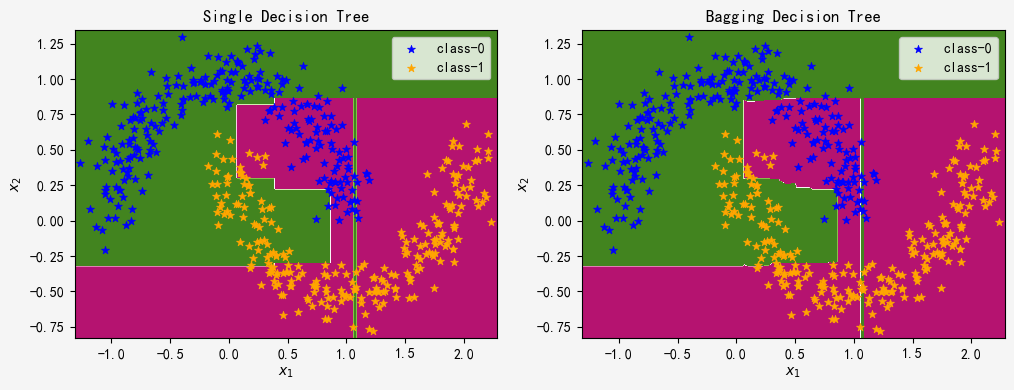

In [28]:
%matplotlib inline
plt.rcParams["font.sans-serif"] = " SimHei"
plt.rcParams["axes.unicode_minus"] = False

fig, ax = plt.subplots(1,2, figsize=(12,4),
                      facecolor="whitesmoke",
                      edgecolor="gray")

ax[0].contourf(X_moon_mesh,Y_moon_mesh,Z_moon_mesh,cmap=plt.cm.PiYG)
for clslist,color,label in zip(y_moon_class,["blue","orange"],["class-0","class-1"]):
    ax[0].scatter(clslist[:,0],clslist[:,1],marker="*",color=color,lw=.5, label=label)
ax[0].set_title("Single Decision Tree")
ax[0].set_xlabel(r"$x_1$")
ax[0].set_ylabel(r'$x_2$')
ax[0].legend(loc="best")

ax[1].contourf(X_moon_mesh,Y_moon_mesh,Z_moon_bag_mesh,cmap=plt.cm.PiYG)
for clslist,color,label in zip(y_moon_class,["blue","orange"],["class-0","class-1"]):
    ax[1].scatter(clslist[:,0],clslist[:,1],marker="*",color=color,lw=.5, label=label)
ax[1].set_title("Bagging Decision Tree")
ax[1].set_xlabel(r"$x_1$")
ax[1].set_ylabel(r'$x_2$')
ax[1].legend(loc="best")